In [0]:
from google.colab import drive
drive.mount('/detection')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /detection


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2


cat: /usr/local/cuda/include/cudnn.h: No such file or directory


In [0]:
!pip install -q keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
# not part of working module
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt
from PIL import Image
# load an image from file
image = load_img('/detection/My Drive/detection/input/after damage 1.jpg', target_size=(1024, 1024))
img = np.asarray(Image.open('/detection/My Drive/detection/input/after damage 1.jpg'))
print(img.shape)
plt.imshow(image)
plt.show()




In [0]:
!ls "/detection/My Drive/detection/"

damaged_20	  post_003_133.png  post_061_057.png  undamaged_200
damaged_200	  post_009_070.png  post_078_062.png  undamaged_50
damaged_50	  post_025_119.png  test1.png
detection.ipynb   post_028_062.png  undamaged
post_001_082.png  post_032_134.png  undamaged_20


In [0]:
# not part of working module
import tensorflow as tf

image=img_to_array(image)
image2 = load_img('/detection/My Drive/detection/post_001_073.png', target_size=(1024, 1024))

image2=img_to_array(image2)
#print(image)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
datadir="/detection/My Drive/detection/"
categories=["damaged", "undamaged"]
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    #plt.imshow(img_array)
    #plt.show()
    break
  break


In [0]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join(datadir,category)
    class_num=categories.index(category) # index as 0 and 1 to damaged and undamaged
    for img in os.listdir(path):
      img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array= cv2.resize(img_array,(128,128))
      training_data.append([img_array,class_num])
      
create_training_data()

In [0]:
print(len(training_data))
import random
random.shuffle(training_data)

268


In [0]:

for sample in training_data:
  print(sample[1])
  
print(len(sample))

In [0]:
x=[]
y=[]
for features, label in training_data:
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,128,128,1)
print(len(x))
print(len(y))

268
268


In [0]:
import pickle
pickle_out=open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [0]:
# x[1] is feature and y[1] is label

1

268
268
Train on 214 samples, validate on 54 samples
Epoch 1/200
214/214 [==============================] - 1s 6ms/sample - loss: 0.7400 - acc: 0.5000 - val_loss: 0.6868 - val_acc: 0.5556
Epoch 2/200
214/214 [==============================] - 0s 926us/sample - loss: 0.6944 - acc: 0.5421 - val_loss: 0.7056 - val_acc: 0.4444
Epoch 3/200
214/214 [==============================] - 0s 778us/sample - loss: 0.6908 - acc: 0.5841 - val_loss: 0.6996 - val_acc: 0.4444
Epoch 4/200
214/214 [==============================] - 0s 744us/sample - loss: 0.6930 - acc: 0.5841 - val_loss: 0.6970 - val_acc: 0.4444
Epoch 5/200
214/214 [==============================] - 0s 733us/sample - loss: 0.6866 - acc: 0.5607 - val_loss: 0.7050 - val_acc: 0.4444
Epoch 6/200
214/214 [==============================] - 0s 730us/sample - loss: 0.6888 - acc: 0.5654 - val_loss: 0.7105 - val_acc: 0.4444
Epoch 7/200
214/214 [==============================] - 0s 740us/sample - loss: 0.6883 - acc: 0.5888 - val_loss: 0.7065 - val_ac

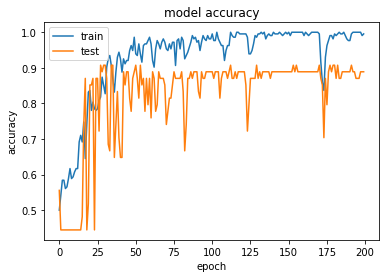

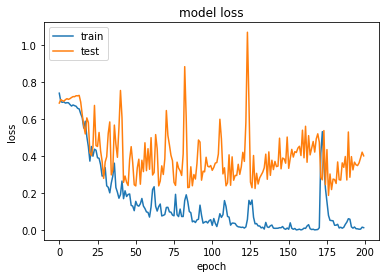

damaged
[[0.]]
36.32619571685791


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle
from keras.preprocessing.image import load_img
import time
#image = load_img('/detection/My Drive/detection/test1.png')

x=pickle.load(open("x.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))
x=x/255.0

start = time.time()
model = Sequential()


model.add( Conv2D(64,(3,3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.50))



model.add( Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))  
model.add(Dropout(0.50))


model.add( Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3,3)))  
model.add(Dropout(0.50))

# added one more layer 
model.add( Conv2D(64,(3,3)))
model.add(Activation("relu"))
 




model.add(Flatten())
model.add(Dense(64))
    


model.add(Dense(1))  
          
model.add(Activation("sigmoid"))
#model.add(Activation("softmax"))


model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=['accuracy'])
print (len(x))
print (len(y))
history=model.fit(x,y, batch_size=32, epochs=200, validation_split=0.2)  
end = time.time()




# list all data in history to plot accuracy
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






#print(model.predict(image))
model.save('128CNN.h5')
model.save_weights('128CNN_weights.h5')




def prepare(filename):
  img_array=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(img_array,(128,128))
  return new_array.reshape(-1,128,128,1)
#model=tf.keras.models.load_model('128CNN.h5')
#model.load_weights('128CNN_weights.h5')
prediction=model.predict([prepare('/detection/My Drive/detection/post_009_070.png')])
#print (categories[int(prediction[0][0])])
print (categories[int(prediction[0])])
print(prediction)
print(end-start)
        

In [0]:
#categories=["damaged","undamaged"] Testing code
def prepare(filename):
  img_array=cv2.imread(filename,cv2.IMREAD_GRAYSCALE)
  new_array=cv2.resize(img_array,(128,128))
  return new_array.reshape(-1,128,128,1)
model=tf.keras.models.load_model('128CNN.h5')
model.load_weights('128CNN_weights.h5')

prediction=model.predict([prepare('/detection/My Drive/detection/post_061_057.png')])
#print (categories[int(prediction[0][0])])
print(prediction)

[[0.]]
